<a href="https://colab.research.google.com/github/nBeliy-01/Neural-networks/blob/master/LR%204/LR_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>Лабораторна робота №4</h1>
    <h3>Студетна групи АнД - 31</h3>
    <h3>Білухи Назара Романовича</h3>
    <h3>Варіант 1</h3>

In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
(train_data_set, train_labels_set), (test_data_set, test_labels_set) = fashion_mnist.load_data()

In [ ]:
# Train shapes & test shapes
print("Train tuple data shape: ", train_data_set.shape)
print("Train tuple labels shape: ", train_labels_set.shape)
print("Test  tuple shape: ", test_data_set.shape)
print("Test tuple labels shape: ", test_labels_set.shape)

Train tuple data shape:  (60000, 28, 28)
Train tuple labels shape:  (60000,)
Test  tuple shape:  (10000, 28, 28)
Test tuple labels shape:  (10000,)


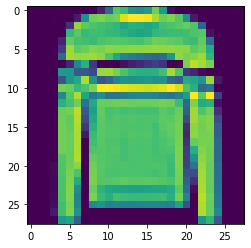

In [ ]:
# Train data
plt.imshow(train_data_set[5])

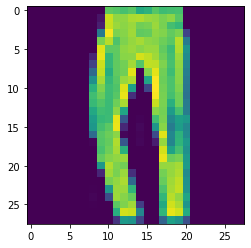

In [ ]:
# Test data
plt.imshow(test_data_set[5])

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
chosen = np.array([0, 3, 7])

In [ ]:
# train data & train labels
train_data = train_data_set[np.argwhere((train_labels_set == 0)|(train_labels_set == 3)|(train_labels_set == 7))]
train_data = np.reshape(train_data, (train_data.shape[0], train_data.shape[2], train_data.shape[3]))
train_labels = train_labels_set[np.argwhere((train_labels_set == 0)|(train_labels_set == 3)|(train_labels_set == 7))]
train_labels = np.reshape(train_labels, train_labels.shape[0])

# test data & test labels
test_data = test_data_set[np.argwhere((test_labels_set == 0)|(test_labels_set == 3)|(test_labels_set == 7))]
test_data = np.reshape(test_data, (test_data.shape[0], test_data.shape[2], test_data.shape[3]))
test_labels = test_labels_set[np.argwhere((test_labels_set == 0)|(test_labels_set == 3)|(test_labels_set == 7))]
test_labels = np.reshape(test_labels, test_labels.shape[0])

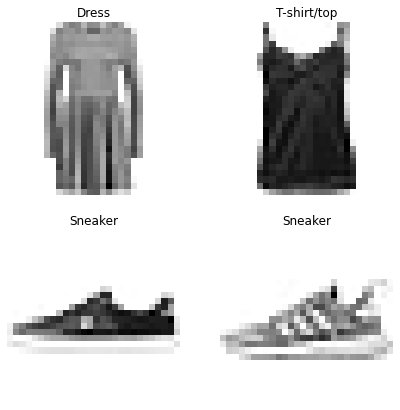

In [ ]:
import random
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [ ]:
tf.random.set_seed(42)

# creation
model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit model
not_normalized_data = model_11.fit(train_data, 
                                   train_labels,
                                   epochs=10,
                                   validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 3s 3ms/step - loss: 2.3459 - accuracy: 0.3274 - val_loss: 1.4808 - val_accuracy: 0.3333
Epoch 2/10
563/563 [==============================] - 2s 3ms/step - loss: 1.3047 - accuracy: 0.3334 - val_loss: 1.1960 - val_accuracy: 0.3333
Epoch 3/10
563/563 [==============================] - 2s 3ms/step - loss: 1.1581 - accuracy: 0.3326 - val_loss: 1.1342 - val_accuracy: 0.3333
Epoch 4/10
563/563 [==============================] - 2s 3ms/step - loss: 1.1237 - accuracy: 0.3392 - val_loss: 1.1164 - val_accuracy: 0.3333
Epoch 5/10
563/563 [==============================] - 2s 3ms/step - loss: 1.1122 - accuracy: 0.3320 - val_loss: 1.1088 - val_accuracy: 0.3333
Epoch 6/10
563/563 [==============================] - 2s 3ms/step - loss: 1.1068 - accuracy: 0.3331 - val_loss: 1.1055 - val_accuracy: 0.3333
Epoch 7/10
563/563 [==============================] - 2s 3ms/step - loss: 1.1020 - accuracy: 0.3349 - val_loss: 1.0853 - val_accuracy: 0.3537
Epoch 

In [ ]:
model_11.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 4)                 3140      
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:title={'center':'Non-normalized Data'}>

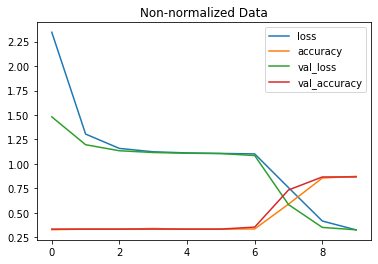

In [ ]:
# plot results for non normalized data
pd.DataFrame(not_normalized_data.history).plot(title="Non-normalized Data")

In [ ]:
# confusion matrix 
y_probs = model_11.predict(test_data)

y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

94/94 [==============================] - 0s 2ms/step


array([[ 720,  254,   26],
       [ 117,  879,    4],
       [   0,    0, 1000]], dtype=int64)

In [ ]:
# normalize data
train_data = train_data / 255.0
test_data = test_data / 255.0

In [ ]:
tf.random.set_seed(42)

# creation
model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile
model_12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit model with NORMALIZED data
normalized_data = model_12.fit(train_data, 
                                   train_labels,
                                   epochs=10,
                                   validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 3s 3ms/step - loss: 0.4676 - accuracy: 0.8772 - val_loss: 0.1419 - val_accuracy: 0.9540
Epoch 2/10
563/563 [==============================] - 2s 3ms/step - loss: 0.1231 - accuracy: 0.9537 - val_loss: 0.1225 - val_accuracy: 0.9553
Epoch 3/10
563/563 [==============================] - 2s 3ms/step - loss: 0.1106 - accuracy: 0.9576 - val_loss: 0.1148 - val_accuracy: 0.9580
Epoch 4/10
563/563 [==============================] - 2s 3ms/step - loss: 0.1024 - accuracy: 0.9612 - val_loss: 0.1097 - val_accuracy: 0.9617
Epoch 5/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0966 - accuracy: 0.9628 - val_loss: 0.1168 - val_accuracy: 0.9553
Epoch 6/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0917 - accuracy: 0.9647 - val_loss: 0.1105 - val_accuracy: 0.9603
Epoch 7/10
563/563 [==============================] - 2s 3ms/step - loss: 0.0889 - accuracy: 0.9654 - val_loss: 0.1085 - val_accuracy: 0.9593
Epoch 

<AxesSubplot:title={'center':'Normalized data'}>

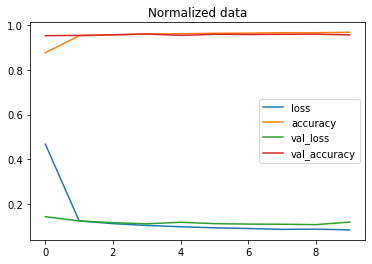

In [ ]:
pd.DataFrame(normalized_data.history).plot(title="Normalized data")

In [ ]:
# confusion matrix 
y_probs = model_12.predict(test_data)

y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

94/94 [==============================] - 0s 2ms/step


array([[ 898,  102,    0],
       [  25,  975,    0],
       [   0,    0, 1000]], dtype=int64)

### Бачимо, що на нормалізованих даних точність моделі є кращою, а значення втрат меншим

In [ ]:
tf.random.set_seed(42)

# creation the model and fitting with different values of learning_rate
model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

model_13.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# fit model with NORMALIZED data
find_lr_history = model_13.fit(train_data,
                               train_labels,
                               epochs=40, # model already doing pretty good with current LR, probably don't need 100 epochs
                               validation_data=(test_data, test_labels),
                               callbacks=[lr_scheduler])

Epoch 1/40
563/563 [==============================] - 3s 3ms/step - loss: 0.4676 - accuracy: 0.8772 - val_loss: 0.1419 - val_accuracy: 0.9540 - lr: 0.0010
Epoch 2/40
563/563 [==============================] - 2s 3ms/step - loss: 0.1229 - accuracy: 0.9543 - val_loss: 0.1218 - val_accuracy: 0.9570 - lr: 0.0011
Epoch 3/40
563/563 [==============================] - 2s 3ms/step - loss: 0.1099 - accuracy: 0.9582 - val_loss: 0.1193 - val_accuracy: 0.9537 - lr: 0.0013
Epoch 4/40
563/563 [==============================] - 2s 3ms/step - loss: 0.1016 - accuracy: 0.9615 - val_loss: 0.1078 - val_accuracy: 0.9610 - lr: 0.0014
Epoch 5/40
563/563 [==============================] - 2s 3ms/step - loss: 0.0960 - accuracy: 0.9634 - val_loss: 0.1221 - val_accuracy: 0.9530 - lr: 0.0016
Epoch 6/40
563/563 [==============================] - 2s 3ms/step - loss: 0.0933 - accuracy: 0.9642 - val_loss: 0.1111 - val_accuracy: 0.9577 - lr: 0.0018
Epoch 7/40
563/563 [==============================] - 1s 3ms/step - lo

Text(0.5, 1.0, 'Finding the ideal learning rate')

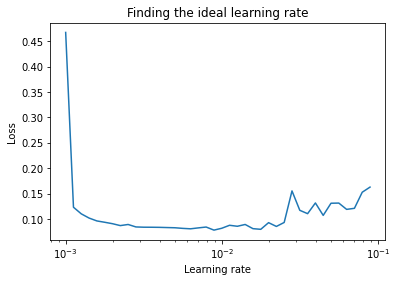

In [ ]:
# finding the best learning rate
lrs = 1e-3 * (10**(np.arange(40)/20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate")

In [ ]:
l_rate = min(find_lr_history.history["loss"])
print('The best learning_rate in loss value:', np.round(l_rate, 3))

The best learning_rate in loss value: 0.078


In [ ]:
tf.random.set_seed(42)

# creation
model_final = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#compile
model_final.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# fit model with NORMALIZED data
final_data = model_final.fit(train_data, 
                                   train_labels,
                                   epochs=10,
                                   validation_data=(test_data, test_labels))

Epoch 1/10
563/563 [==============================] - 2s 3ms/step - loss: 0.3818 - accuracy: 0.8492 - val_loss: 0.1427 - val_accuracy: 0.9517
Epoch 2/10
563/563 [==============================] - 1s 3ms/step - loss: 0.1269 - accuracy: 0.9551 - val_loss: 0.1337 - val_accuracy: 0.9547
Epoch 3/10
563/563 [==============================] - 1s 3ms/step - loss: 0.1171 - accuracy: 0.9587 - val_loss: 0.1465 - val_accuracy: 0.9467
Epoch 4/10
563/563 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9626 - val_loss: 0.1163 - val_accuracy: 0.9593
Epoch 5/10
563/563 [==============================] - 2s 3ms/step - loss: 0.1018 - accuracy: 0.9618 - val_loss: 0.1204 - val_accuracy: 0.9570
Epoch 6/10
563/563 [==============================] - 1s 3ms/step - loss: 0.1000 - accuracy: 0.9623 - val_loss: 0.1251 - val_accuracy: 0.9523
Epoch 7/10
563/563 [==============================] - 1s 2ms/step - loss: 0.0993 - accuracy: 0.9631 - val_loss: 0.1185 - val_accuracy: 0.9580
Epoch 

<AxesSubplot:title={'center':'Final data'}>

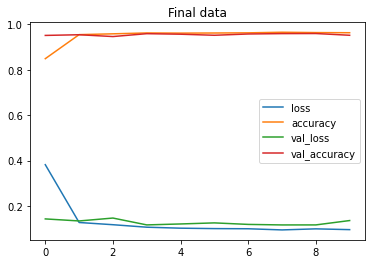

In [ ]:
pd.DataFrame(final_data.history).plot(title="Final data")

In [ ]:
# confusion matrix 
y_probs = model_final.predict(test_data)

y_preds = y_probs.argmax(axis=1)
confusion_matrix(y_true = test_labels,
                 y_pred = y_preds)

94/94 [==============================] - 0s 2ms/step


array([[ 893,  106,    1],
       [  36,  964,    0],
       [   0,    0, 1000]], dtype=int64)

In [ ]:
model_final.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


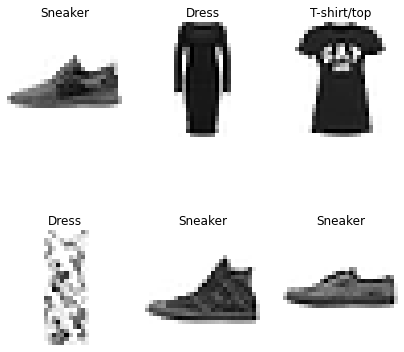

In [ ]:
# check our model results
plt.figure(figsize=(7, 7))
for i in range(6):
    ax = plt.subplot(2, 3, i + 1)
    rand_index = random.choice(range(len(test_data)))
    plt.imshow(test_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[y_preds[rand_index]])
    plt.axis(False)

#### В ході виконання лабораторної роботи було створено та навчено модель, яка здатна розпізнавати різні типи одягу. Використано бібліотеку TensorFlow для створення моделі, використовували вбудовані метрики. Досліджено поведінку моделі при різних значеннях показника швидкості навчання (learning_rate) та аналіз моделі за допомоги матриці  помилок (confusion_matrix)